https://towardsdatascience.com/generate-random-variable-using-inverse-transform-method-in-python-8e5392f170a3
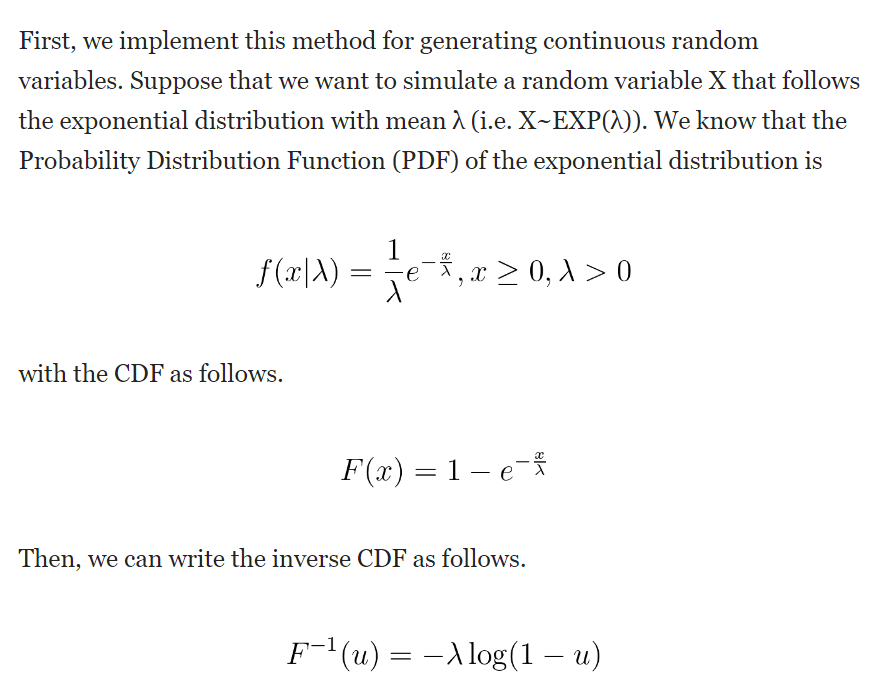

In [ ]:
### Generate exponential distributed random variables given the mean and number of random variables
### Continuous r.v. case

import numpy as np
from matplotlib import pyplot as plt



def exponential_inverse_trans(n=1,mean=1):
    U = np.random.rand(n)
    X = -mean * np.log(1 - U)
    actual = np.random.exponential(scale=mean, size=n)
    
    plt.figure(figsize=(12, 9))
    plt.hist(X, bins=50, alpha=0.5, label="Generated r.v.")
    plt.hist(actual, bins=50, alpha=0.5, label="Actual r.v.")
    plt.title("Generated vs Actual %i Exponential Random Variables" % n)
    plt.legend()
    plt.show()
    return X

cont_example1=exponential_inverse_trans(n=100,mean=4)
cont_example2=exponential_inverse_trans(n=500,mean=4)
cont_example3=exponential_inverse_trans(n=1000,mean=4)

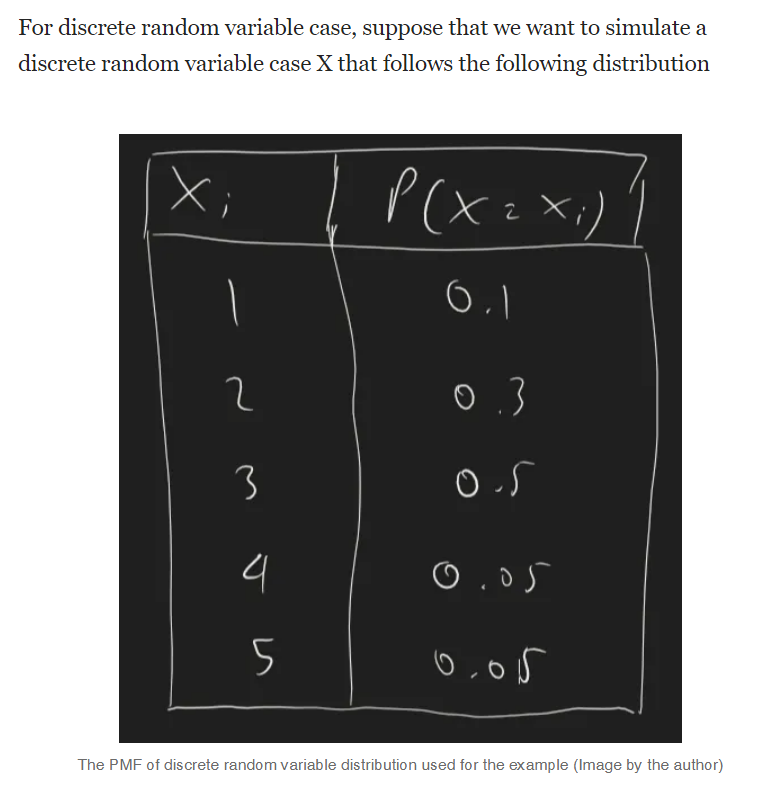
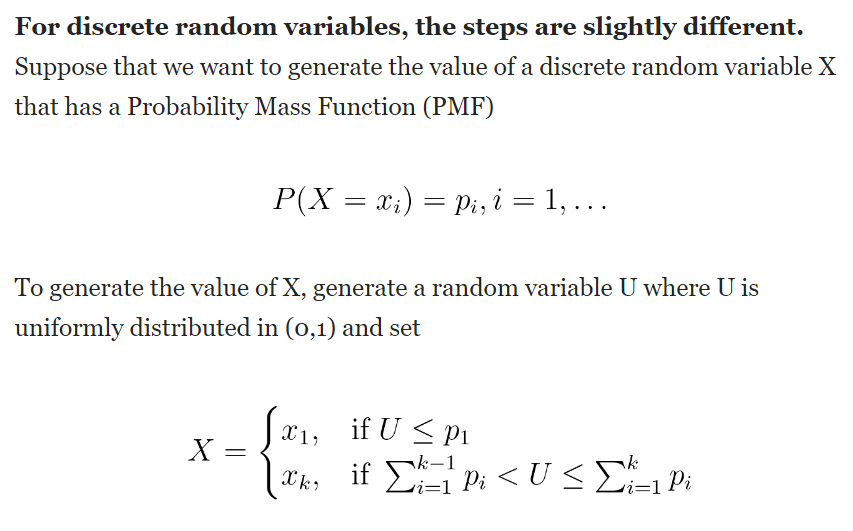

In [ ]:
### Generate arbitary discrete distributed random variables given the probability vector
### Discrete r.v. case

# First, we write the function to generate the discrete random variable for one sample with these lines of code.
import numpy as np
import pandas as pd
from scipy.stats import uniform, expon
from matplotlib import pyplot as plt


def discrete_inverse_trans(prob_vec):
    U = uniform.rvs(size=1)
    if U <= prob_vec[0]:
        return 1
    else:
        for i in range(1, len(prob_vec)):
            if sum(prob_vec[:i]) < U and sum(prob_vec[:i + 1]) >= U:
                return i + 1

# Then, we create a function to generate many random variable samples with these lines of code.
def discrete_samples(prob_vec, n=1):
    sample = []
    for i in range(n):
        sample.append(discrete_inverse_trans(prob_vec))
    return np.array(sample)

# Finally, we create a function to simulate the result and compare it with the actual one by these lines of code.
def discrete_simulate(prob_vec, numbers, n=1):
    sample_disc = discrete_samples(prob_vec, n)
    unique, counts = np.unique(sample_disc, return_counts=True)
    
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    prob = counts / n
    ax.bar(numbers, prob)
    ax.set_title("Simulation of Generating %i Discrete Random Variables" % n)
    plt.show()
    
    data = {'X': unique, 'Number of samples': counts, 'Empirical Probability': prob, 'Actual Probability': prob_vec}
    df = pd.DataFrame(data=data)
    return df


prob_vec = np.array([0.1, 0.3, 0.5, 0.05, 0.05])
numbers = np.array([1, 2, 3, 4, 5])
dis_example1 = discrete_simulate(prob_vec, numbers, n=100)
dis_example2 = discrete_simulate(prob_vec, numbers, n=500)
dis_example3 = discrete_simulate(prob_vec, numbers, n=1000)